# Task 2

Predict the percentage of students based on the no. of study hours.

In [1]:
# Importing all the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [2]:
# Reading data from csv file

data = pd.read_csv('student_scores.csv')

In [3]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [4]:
# Getting value of hours and scores from dataframe into variables- hours and scores

hours, scores = data['Hours'], data['Scores']

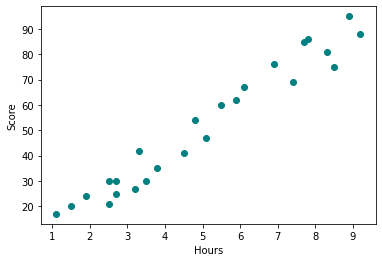

In [5]:
# Scatter plot of the data to determine relationship between the two variables

plt.scatter(hours, scores,  color='teal')
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.show()

#### We can see from the above graph that there is a positive linear relationship between hours and scores. 

## Linear regression using sklearn

In [6]:
hours.head(8)

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
5    1.5
6    9.2
7    5.5
Name: Hours, dtype: float64

In [7]:
# Converting hours and scores from pandas Series into numpy array

hours = hours.values.reshape(-1,1)
scores = scores.values.reshape(-1,1)

In [8]:
## Split the data into training/testing sets

hours_train, hours_test, scores_train, scores_test = train_test_split(hours, scores, test_size=0.16, random_state=0)

In [9]:
# First eight values of training datasets
hours_train[:8], scores_train[:8]

(array([[5.9],
        [3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7]]),
 array([[62],
        [35],
        [24],
        [86],
        [76],
        [17],
        [47],
        [85]], dtype=int64))

In [10]:
# Creating linear regression object
regr = linear_model.LinearRegression()

In [11]:
# Training the model using training dataset
regr.fit(hours_train, scores_train)

LinearRegression()

In [12]:
# Predictions using the testing dataset
scores_pred = regr.predict(hours_test)

In [13]:
pd.DataFrame.from_dict({'hours_test' : hours_test.tolist(), 'scores_test' : scores_test.tolist(), 'scores_predicted' : scores_pred.tolist()}, orient='index').T

,hours_test,scores_test,scores_predicted
0,[1.5],[20],[16.92714814644115]
1,[3.2],[27],[33.78826949962361]
2,[7.4],[69],[75.44515754866264]
3,[2.5],[30],[26.845454824783776]


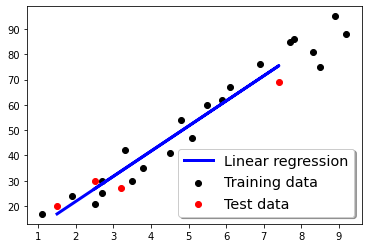

In [14]:
plt.scatter(hours_train, scores_train,  color='black', label= 'Training data')
plt.scatter(hours_test, scores_test,  color='red', label= 'Test data')
plt.plot(hours_test, scores_pred, color='blue', linewidth=3, label= 'Linear regression')

legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')

plt.show()

In [15]:
# Testing our own data
print(regr.predict(np.array([[9.25]])))
print(f'Hours= {9.25}, Score= {regr.predict(np.array([[9.25]]))[0][0]}')

[[93.7940249]]
Hours= 9.25, Score= 93.7940249035965


## Evaluating our model

In [16]:
print('Mean Absolute Error:', mean_absolute_error(scores_test, scores_pred)) 

Mean Absolute Error: 4.8652060192653295


In [17]:
print('Mean Squared Error:', mean_squared_error(scores_test, scores_pred))

Mean Squared Error: 26.753558100750784


In [18]:
print('Root Mean Squared Error:', mean_squared_error(scores_test, scores_pred, squared= False))

Root Mean Squared Error: 5.1723841795395264


In [19]:
print('Coefficient of determination: %.2f' % r2_score(scores_test, scores_pred))

Coefficient of determination: 0.93
